 **-->Loading the dataset**

In [21]:
import pandas as pd
data=pd.read_csv("Dataset .csv")
display(data.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**-->Level 1 : Task 1 (Top Cuisines)**

**-->Determine the top three most 
common cuisines in the dataset**

In [22]:
data['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [23]:
sum(data['Cuisines'].isna())

9

In [24]:
cuisines_count=data['Cuisines'].str.split(', ').explode().value_counts()
print(cuisines_count)
top_three_cuisines=cuisines_count.head(3)
print('\nTop three cuisines are:\n',top_three_cuisines)

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64

Top three cuisines are:
 Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


**-->Calculate the percentage of
restaurants that serve each of the top
cuisines**

In [25]:
r=len(data['Restaurant Name'])
print('total number of restaurant: ',r)

total number of restaurant:  9551


In [26]:
restaurant_percentage=(top_three_cuisines/r)*100
print(restaurant_percentage)
print('\n',restaurant_percentage.iloc[0],'% restaurants serve the North Indian cuisine, ',restaurant_percentage.iloc[1],'% restaurants serve the Chinese cuisine and ',restaurant_percentage.iloc[2],'% restaurants serve the Fast Food cuisine')

Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64

 41.461627054758665 % restaurants serve the North Indian cuisine,  28.635744948172963 % restaurants serve the Chinese cuisine and  20.793634174431997 % restaurants serve the Fast Food cuisine


**-->Level 1 : Task 2 (City Analysis)**

**-->Identify the city with the highest number
of restaurants in the dataset**

In [27]:
len(data['City'].unique())

141

In [28]:
c=data['City'].value_counts()
c1=c.head(1)
print('City which has the highest number of restaurants:',c1)

City which has the highest number of restaurants: City
New Delhi    5473
Name: count, dtype: int64


**-->Calculate the average rating for
restaurants in each city**

In [29]:
avg_rating=data['Aggregate rating'].groupby(data['City']).mean()
print(avg_rating)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


**-->Determine the city with the highest
average rating**

In [30]:
print('City with the highest average rating:',avg_rating.head(1))

City with the highest average rating: City
Abu Dhabi    4.3
Name: Aggregate rating, dtype: float64


**-->Level 1 : Task 3 (Price Range Distribution)**

**-->Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.**

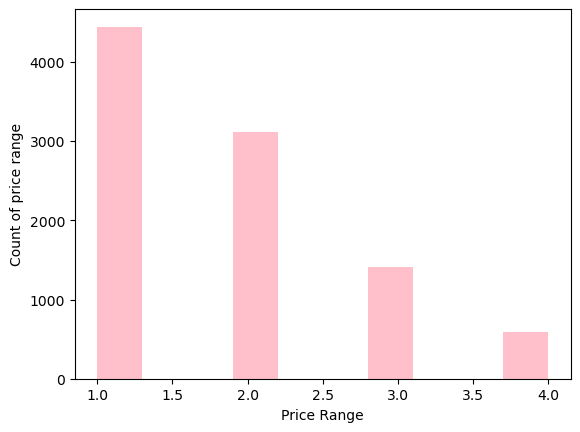

In [31]:
import matplotlib.pyplot as plt
plt.hist(data['Price range'],color='pink')
plt.xlabel('Price Range')
plt.ylabel('Count of price range')
plt.show()

**-->Calculate the percentage of restaurants
in each price range category**

In [32]:
r=len(data['Restaurant Name'])
p=data['Price range'].value_counts()
percentage_restaurant=(p/r)*100
print('percentage of restaurants in each price range category:\n',percentage_restaurant)

percentage of restaurants in each price range category:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


**-->Level 1 : Task 4 (Online Delivery)**

**-->Determine the percentage of restaurants
that offer online delivery.**

In [33]:
r=len(data['Restaurant Name'])
x=data['Has Online delivery'].value_counts()
print(x)
percentage_restaurant=(x/r)*100
print('\n',percentage_restaurant)
print('\npercentage of restaurants that offer online delivery:',percentage_restaurant.iloc[1])

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

 Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64

percentage of restaurants that offer online delivery: 25.662234321013504


**-->Compare the average ratings of restaurants
with and without online delivery.**

In [34]:
avg_rating=data['Aggregate rating'].groupby(data['Has Online delivery']).mean()
print(avg_rating)
print('\nAverage ratings of restaurants with online delivery is',avg_rating.iloc[1],' and without online delivery is',avg_rating.iloc[0])

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

Average ratings of restaurants with online delivery is 3.2488372093023252  and without online delivery is 2.465295774647887


**-->Level 2 : Task 1 (Restaurant Ratings)**

**-->Analyze the distribution of aggregate
ratings and determine the most common
rating range**

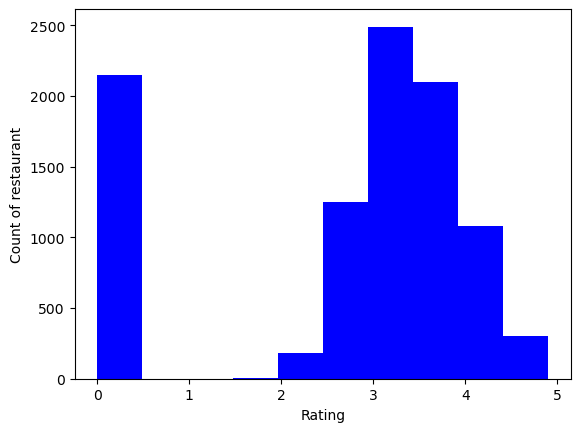

The most common rating range is 0.0 with 2148 restaurants.


In [35]:
import matplotlib.pyplot as plt
p=data['Aggregate rating'].value_counts().sort_index()
plt.hist(data['Aggregate rating'],color='blue')
plt.xlabel('Rating')
plt.ylabel('Count of restaurant')
plt.show()
most_common_rating_range = p.idxmax()
most_common_rating_count = p.max()
print(f'The most common rating range is {most_common_rating_range} with {most_common_rating_count} restaurants.')

**-->Calculate the average number of votes
received by restaurants**

In [36]:
avg_votes=data['Votes'].mean()
print('Average number of votes received by restaurants:',avg_votes)

Average number of votes received by restaurants: 156.909747670401


**-->Level 2 : Task 2 (Cuisine Combination)**

**-->Identify the most common combinations of
cuisines in the dataset.**

In [37]:
c=data['Cuisines'].value_counts()
print('Top common combinations of cuisines:',c.head(3))

Top common combinations of cuisines: Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


**-->Determine if certain cuisine combinations
tend to have higher ratings.**

In [38]:
higher_rating=data['Aggregate rating'].groupby(data['Cuisines']).max()
print(f'{higher_rating.idxmax()} cuisines Combination has highest rating which is {higher_rating.max()}.')

American, BBQ, Sandwich cuisines Combination has highest rating which is 4.9.


**-->Level 2 : Task 3 (Geographic Analysis)**

**-->Plot the locations of restaurants on a
map using longitude and latitude
coordinates.**

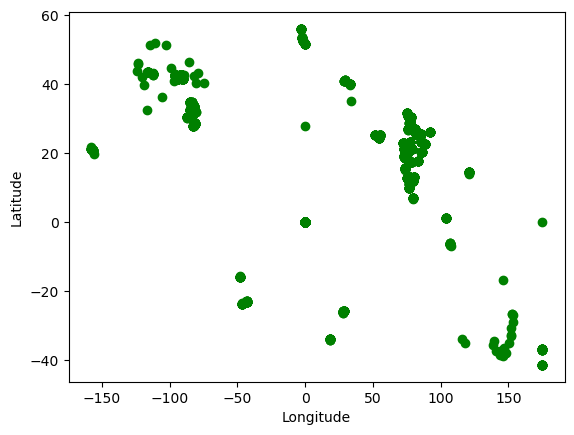

In [39]:
import matplotlib.pyplot as plt
plt.scatter(x=data['Longitude'],y=data['Latitude'],color='green')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**-->Identify any patterns or clusters of
restaurants in specific areas.**

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


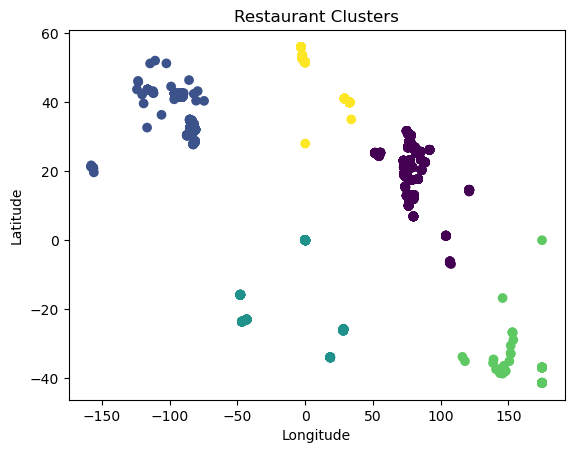

In [40]:
from sklearn.cluster import KMeans
coordinates = data[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(coordinates)
data['Cluster'] = kmeans.labels_
plt.scatter(coordinates['Longitude'], coordinates['Latitude'], c=data['Cluster'], marker='o')
plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**-->Level 2 : Task 4 (Restaurant Chains)**

**-->Identify if there are any restaurant chains
present in the dataset.**

In [41]:
restaurant_count=data['Restaurant Name'].value_counts()
restaurant_chain=restaurant_count[restaurant_count>1]
print('Restaurant chains:',restaurant_chain)

Restaurant chains: Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


**-->Analyze the ratings and popularity of
different restaurant chains.**

In [42]:
chains_df = data[data['Restaurant Name'].isin(restaurant_chain.index)]
chain_analysis = chains_df.groupby('Restaurant Name').agg({'Aggregate rating': 'mean','Votes': 'sum'}).reset_index()
chain_analysis = chain_analysis.sort_values(by=['Aggregate rating', 'Votes'], ascending=[False, False])
print(chain_analysis)

               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
8      AB's Absolute Barbecues             4.850   3151
589           Silantro Fil-Mex             4.850   1364
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
..                         ...               ...    ...
440           Murliwala Bakers             0.000      0
538        Rajdhani Restaurant             0.000      0
616                Street Cafe             0.000      0
645              The Big Scoop             0.000      0
713               Whatslife.in             0.000      0

[734 rows x 3 columns]


**-->Level 3 : Task 1 (Restaurant Reviews)**

**-->Analyze the text reviews to identify the most
common positive and negative keywords.**

In [43]:
data['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [44]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [45]:
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import nltk

# nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text) 
    text = text.lower()  
    text = text.split()  
    text = [word for word in text if word not in stopwords.words('english')]
    return ' '.join(text)

data['Cleaned Reviews'] = data['Rating text'].astype(str).apply(clean_text)

def classify_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

data['Sentiment'] = data['Cleaned Reviews'].apply(classify_sentiment)

positive_reviews = ' '.join(data[data['Sentiment'] == 'positive']['Cleaned Reviews'])
negative_reviews = ' '.join(data[data['Sentiment'] == 'negative']['Cleaned Reviews'])

positive_words = Counter(positive_reviews.split())
negative_words = Counter(negative_reviews.split())

top_positive_words = positive_words.most_common(5)
top_negative_words = negative_words.most_common(5)

print("Top 5 Positive Keywords:")
for word, freq in top_positive_words:
    print(f"{word}: {freq}")

print("\nTop 5 Negative Keywords:")
for word, freq in top_negative_words:
    print(f"{word}: {freq}")

Top 5 Positive Keywords:
good: 3179
excellent: 301

Top 5 Negative Keywords:
average: 3737
poor: 186


**-->Calculate the average length of reviews and
explore if there is a relationship between
review length and rating**

In [46]:
data['Rating length']=data['Rating text'].astype(str).apply(len)
avg_length=data['Rating length'].mean()
print('Average length of review:',avg_length)
correlation = data[['Rating length', 'Aggregate rating']].corr().iloc[0,1]
print('Relationship between review length and rating:',correlation)

Average length of review: 7.020730813527379
Relationship between review length and rating: -0.4788848381349332


**-->Level 3 : Task 2 (Votes Analysis)**

**-->Identify the restaurants with the highest and
lowest number of votes.**

In [47]:
i1=data['Votes'].idxmax()
i2=data['Votes'].idxmin()
print('Restaurants with the highest Votes is',data['Restaurant Name'].iloc[i1])
print('Restaurants with the lowest Votes is',data['Restaurant Name'].iloc[i2])

Restaurants with the highest Votes is Toit
Restaurants with the lowest Votes is Cantinho da Gula


**-->Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.**

In [48]:
correlation = data[['Aggregate rating', 'Votes']].corr().iloc[0,1]
print('Relationship between Rating and Votes:',correlation)

Relationship between Rating and Votes: 0.3136905841954099


**-->Level 3 : Task 3 (Votes Analysis)**

**-->Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.**

In [49]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Has Online delivery'] = label_encoder.fit_transform(data['Has Online delivery'])
data['Has Table booking'] = label_encoder.fit_transform(data['Has Table booking'])
correlation = data[['Price range','Has Online delivery', 'Has Table booking']].corr()
print('Relationship between the price range and the availability of online delivery and table booking:\n',correlation)

Relationship between the price range and the availability of online delivery and table booking:
                      Price range  Has Online delivery  Has Table booking
Price range             1.000000             0.077918           0.501925
Has Online delivery     0.077918             1.000000           0.101224
Has Table booking       0.501925             0.101224           1.000000


**-->Determine if higher-priced restaurants are
more likely to offer these services.**

In [50]:
online_delivery_proportions = data.groupby('Price range')['Has Online delivery'].mean() * 100
table_booking_proportions = data.groupby('Price range')['Has Table booking'].mean() * 100
print('\nOnline service provider:\n',online_delivery_proportions)
print('\nTable booking service provider:\n',table_booking_proportions)


Online service provider:
 Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64

Table booking service provider:
 Price range
1     0.022502
2     7.677482
3    45.738636
4    46.757679
Name: Has Table booking, dtype: float64


In [51]:
data.to_csv("Final_Restaurant_data.csv")